# Lab 4: ANN Regression Example using Keras
[Keras](https://keras.io/) provides a Python interface for the [TensorFlow](https://www.tensorflow.org/) library.

In [10]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# !python3 -m pip install -U tensorflow
import tensorflow as tf
from tensorflow import keras

seed = 184
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
# For simplicity, we use Scikit-Learn’s fetch_california_housing() function to load the data.
# This dataset is simpler than the one we used earlier in the course, since it contains only
# numerical features (there is no ocean_proximity feature), and there is no missing value:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# let's see the features:
print("Features:", housing.feature_names)

# let's see the target:
print("Target:", housing.target_names)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: ['MedHouseVal']


In [12]:
# We split the data into a training set, a validation set, and a test set:
X_train_full, X_test,  y_train_full, y_test  = train_test_split(housing.data, housing.target, random_state=seed)
X_train,      X_valid, y_train,      y_valid = train_test_split(X_train_full, y_train_full,   random_state=seed)

# We scale all the features:
scaler = StandardScaler()

# X_train = scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# or
X_train = scaler.fit_transform(X_train)

X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# The fit() method is used to compute the mean and std dev for a given feature to be used further for scaling.
# The transform() method is used to perform scaling using mean and std dev calculated using the .fit() method.
# The fit_transform() method does both fits and transform.

In [13]:
# First create a Sequential model. This is the simplest kind of Keras model for neural networks that
# are just composed of a single stack of layers connected sequentially. This is called the Sequential API:
from keras.models import Sequential
# The Sequential API is quite easy to use. However, although Sequential models are extremely common, not all
# neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs
# and/or multiple outputs (more complex topologies). For this purpose, Keras offers the Functional API.

model = Sequential([
                    # Add a Dense hidden layer with 30 neurons with ReLU activation function
                    # see https://keras.io/api/layers/core_layers/dense/
                    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),

                    # Add a Dense output layer with 1 neuron. It this was a classification problem,
                    # you would need one per class with SoftMax activation function.
                    keras.layers.Dense(1)
                   ])

# Use `.compile()` to configure the model for training: 
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Train the model with `.fit()` for a fixed number of epochs (dataset iterations):
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# more details on these methods at:
# https://keras.io/api/models/model_training_apis/

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8842 - val_loss: 0.8134
Epoch 2/20
363/363 [==============================] - 0s 983us/step - loss: 0.7701 - val_loss: 0.6680
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6922 - val_loss: 0.6383
Epoch 4/20
363/363 [==============================] - 0s 996us/step - loss: 0.6588 - val_loss: 0.6133
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6326 - val_loss: 0.5930
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6097 - val_loss: 0.5749
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5899 - val_loss: 0.5588
Epoch 8/20
363/363 [==============================] - 0s 986us/step - loss: 0.5726 - val_loss: 0.5442
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5577 - val_loss: 0.5336
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5447 - val_loss: 

In [14]:
# Do a simple test over n instances of the test set:
n=3
y_pred = model.predict(X_test[:n])
y_true = y_test[:n]

print("\nPrediction:", y_pred)
print("\nTrue:", y_true)

1/1 [==============================] - 0s 32ms/step

Prediction: [[1.7133533]
 [1.6267424]
 [2.2731464]]

True: [1.19  1.557 2.169]


       loss  val_loss
0  1.884177  0.813350
1  0.770093  0.667988
2  0.692208  0.638285


<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Epoch'>

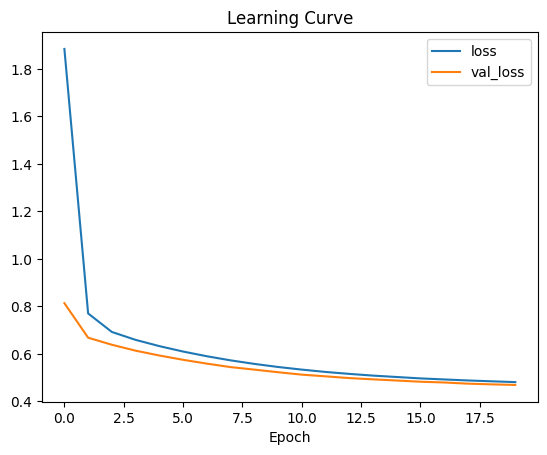

In [15]:
# Plot learning curve
l = pd.DataFrame(history.history)
print(l.head(3))
l.plot(title="Learning Curve", xlabel="Epoch")

In [16]:
mse_train = model.evaluate(X_train, y_train)
print("Prediction Mean Squared Error:", round(mse_train,2))

363/363 [==============================] - 0s 701us/step - loss: 0.4790
Prediction Mean Squared Error: 0.48


In [17]:
mse_test = model.evaluate(X_test, y_test)
print("Generalization Mean Squared Error:", round(mse_test,2))

162/162 [==============================] - 0s 697us/step - loss: 0.4841
Generalization Mean Squared Error: 0.48
